In [1]:
#Saturated Oxygen Data Correction
from oxyfloat import OxyFloat, RequiredVariableNotPresent, OpenDAPServerError

of = OxyFloat()

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%time
oga_floats = of.get_oxy_floats()

CPU times: user 358 ms, sys: 167 ms, total: 525 ms
Wall time: 40.5 s


In [4]:
# Testing with a float that has data
oga_floats = ['1900650']
test_file = '.nc'

In [5]:
i = 0
y = []
for dac_url in of.get_dac_urls(oga_floats):
    for profile_url in of.get_profile_opendap_urls(dac_url):
        if test_file:
            if not profile_url.endswith(test_file):
                continue
        i += 1
        if i == 7:
            print "Break"
            break
        print 'Reading data from ...' + profile_url[40:]
        try:
            d = of.get_profile_data(profile_url)
            y.append(d)
        except RequiredVariableNotPresent as e:
            print e
        except OpenDAPServerError as e:
            print e
    break

Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_137.nc
Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_135.nc
Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_134.nc
Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_133.nc
Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_132.nc
Reading data from ...IOLIS-ARGO-GDAC-OBS/coriolis/1900650/profiles/D1900650_131.nc
Break


In [6]:
# Demonstrate reading the data
print d['p'][0]['long_name'] + ' (' + d['p'][0]['units'] + ')'
print d['p'][1][:10]
print d['o'][0]['long_name'] + ' (' + d['o'][0]['units'] + ')'
print d['o'][1][:10]

SEA PRESSURE (decibar)
[4.5, 6.199999809265137, 9.09999942779541, 14.399999618530273, 19.30000114440918, 24.5, 29.30000114440918, 34.5, 39.400001525878906, 44.29999923706055]
DISSOLVED OXYGEN (micromole/kg)
[199.9600067138672, 199.5399932861328, 199.52000427246094, 201.66000366210938, 203.85000610351562, 203.85000610351562, 207.5399932861328, 204.80999755859375, 195.13999938964844, 176.66000366210938]


In [7]:
sum_surf_o2 = 0
j = 0
for i,prof in enumerate(y):
    print i, prof['o'][1][0]
    j += 1
    sum_surf_o2 += prof['o'][1][0]
    
print sum_surf_o2 / j
    

0 206.490005493
1 204.11000061
2 190.630004883
3 195.669998169
4 198.949996948
5 199.960006714
199.301668803


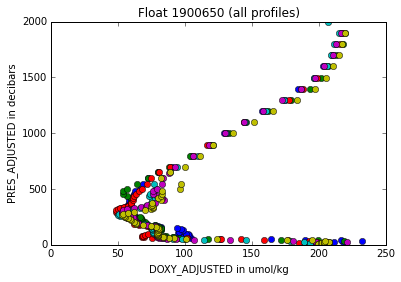

In [8]:
for prof in y:
    plot(prof['o'][1][:] , prof['p'][1][:] , 'o')

title('Float 1900650 (all profiles)')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

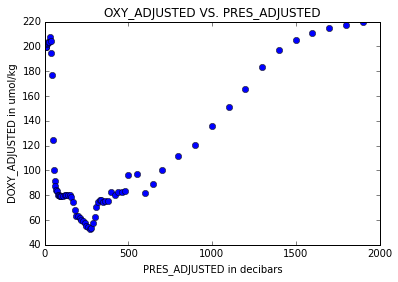

In [9]:
plot(d['p'][1][:] , d['o'][1][:] , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
ylabel('DOXY_ADJUSTED in umol/kg')
xlabel('PRES_ADJUSTED in decibars')

The code below is form the old notebook. Some of it may be folded into oxyfloat functions.

In [ ]:
floatLookup = {}
for url in urls:
    print url
    ds = Dataset(url)
    floatNum = url.split('/')[9]
    print floatNum
    p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], 
               ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])
    lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])
    
    # Convert o from micromol/kg to ml/l 
    ##perc_sat = 100 * convertTomll(o) / satO2(s,t) 
    print s,t,perc_sat
    floatLookup[floatNum] = (p,t,s,o,lat,lon,mtime)

In [ ]:
p,t,s,o = (ds.variables['PRES_ADJUSTED'][0][0], ds.variables['TEMP_ADJUSTED'][0][0], ds.variables['PSAL_ADJUSTED'][0][0], ds.variables['DOXY_ADJUSTED'][0][0])

In [ ]:
p,t,s,o

In [ ]:
lat,lon,mtime = (ds.variables['LATITUDE'][0], ds.variables['LONGITUDE'][0], ds.variables['JULD'][0])

In [ ]:
lat,lon,mtime

In [ ]:
oxygen arange(0. , 651. , 350.) #In umol/kg

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
oxygen = arange(0. , 651. , 50.) #In umol/kg
pressure = arange(0. , 13001. , 1000.) #In decibars

In [4]:
oxygen

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.])

In [5]:
pressure

array([     0.,   1000.,   2000.,   3000.,   4000.,   5000.,   6000.,
         7000.,   8000.,   9000.,  10000.,  11000.,  12000.,  13000.])

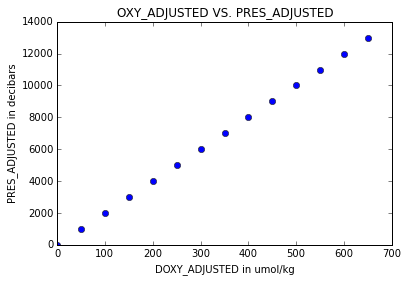

In [6]:
plot(oxygen , pressure , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

In [7]:
oxy = array([650. , 532.1 , 420.9 , 357.43 , 231.2 , 101.1 , 85.4])


pres = array([12000. , 8943.32 , 5421.8 , 4932.7 , 3547.19 , 2017.69 , 958.3])

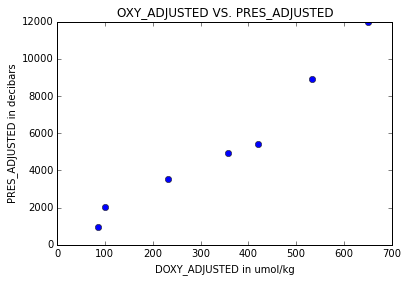

In [8]:
plot(oxy , pres , 'o')
title('OXY_ADJUSTED VS. PRES_ADJUSTED')
xlabel('DOXY_ADJUSTED in umol/kg')
ylabel('PRES_ADJUSTED in decibars')

In [20]:
y = []

x = arange(1 , 10)

for x in range(10):
    y.append(x)

In [21]:
print y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
